Importacion de Liberarias

In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt

Carga de data remesas

In [ ]:
df_remesas = pd.read_csv("./API_BM.TRF.PWKR.CD.DT_DS2_en_csv_v2_5362414.csv")
df_remesas


Colapso de la informacion de anios en una sola columna

In [14]:
import pandas as pd

# Melt the DataFrame to create the 'Year' column
df_remesas_melt = pd.melt(df_remesas, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                          value_vars=[str(year) for year in range(1960, 2022)],
                          var_name='Year', value_name='Value')

# Drop the 'Indicator Name' and 'Indicator Code' columns since they are not relevant for your analysis
df_remesas_melt = df_remesas_melt.drop(['Indicator Name', 'Indicator Code'], axis=1)

# Sort the DataFrame by country and year
df_remesas_melt = df_remesas_melt.sort_values(['Country Name', 'Year'])

# Reset the index of the DataFrame
df_remesas_melt = df_remesas_melt.reset_index(drop=True)


Guardado de la tabla Remesas

In [ ]:
df_remesas_melt.to_csv('remesas.csv', index=False)

In [ ]:
df_top5 = df1[(df1['Country Name'] == 'Spain') | (df1['Country Name'] == 'Belgium') | (df1['Country Name'] == 'Switzerland') | (df1['Country Name'] == 'Denmark') | (df1['Country Name'] == 'Germany')]

Leyendo la tabla remesas

In [4]:
df_remesas = pd.read_csv("remesas.csv")

In [5]:
df_remesas.head()

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,1960,NaN
1,Afghanistan,AFG,1961,NaN
2,Afghanistan,AFG,1962,NaN
3,Afghanistan,AFG,1963,NaN
4,Afghanistan,AFG,1964,NaN


In [7]:
import pandas as pd

# Seleccionar solo las filas correspondientes a los paises que nos interesan
df_paises = df_remesas[df_remesas['Country Name'].isin(['Belgium', 'Spain', 'Switzerland', 'Germany', 'Denmark'])]

# Calcular el promedio de los valores de la columna 'Value'
promedio = df_paises['Value'].mean()

promedio
# print("El promedio de la columna 'Value' para los paises 'Belgium', 'Spain', 'Switzerland', 'Germany' y 'Denmark' es: ", promedio)


5783081084.377266

Los 5 tails

In [17]:
df_top5 = df_remesas[(df_remesas['Country Name'] == 'Poland') | (df_remesas['Country Name'] == 'Turkiye') | (df_remesas['Country Name'] == 'Romania') | (df_remesas['Country Name'] == 'Syrian Arab Republic') | (df_remesas['Country Name'] == 'Morocco')]
df_top5['Value'].mean()

572787142.176182

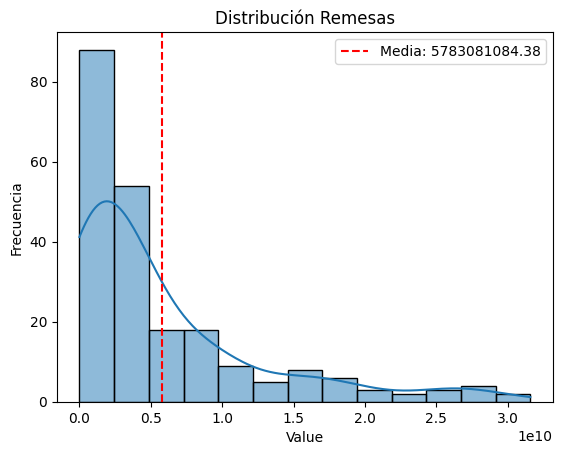

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un histograma de la columna 'Value' para todos los países
sns.histplot(data=df_top5, x='Value', kde=True)

# Calcula la media de la columna 'Value'
mean = df_top5['Value'].mean()

# Agrega una línea vertical en la media
plt.axvline(x=mean, color='red', linestyle='--', label=f'Media: {mean:.2f}')

# Personaliza la gráfica
plt.xlabel('Value')
plt.ylabel('Frecuencia')
plt.title('Distribución Remesas')
plt.legend()

# Muestra la gráfica
plt.show()
